## Eletric Power Consuption DataSet  Information

DataSet from University of California Irvine (UCI)
<br>
Available at https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption
<br><br>
**Attribute Information:**
<br>
1.date: Date in format dd/mm/yyyy
<br>
2.time: time in format hh:mm:ss 
<br>
3.global_active_power: household global minute-averaged active power (in kilowatt) 
<br>
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
<br>
5.voltage: minute-averaged voltage (in volt) 
<br>
6.global_intensity: household global minute-averaged current intensity (in ampere) 
<br>
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a 
dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
<br>
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a 
washing-machine, a tumble-drier, a refrigerator and a light. 
<br>
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


## Transforming data to DataFrame

In [2]:
import pandas as pd
df = pd.read_csv('household_power_consumption.txt', sep=';', infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'])

In [3]:
## Convert data nan

columns_fill = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for column in columns_fill:
    df[column].fillna((df[column].mean()), inplace=True)

## Adding Sub_metering_4
Acoording to the dataset information, the following equation gives the active energy consumed by other household eletrical equipments.
(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3)

In [4]:
df['Sub_metering_4'] = (df['Global_active_power']*1000/60 - df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3'])
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


## Converting Date and Time

####  Creating DateTime column (str to timestamp)

In [6]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000,2006-12-16 17:28:00


####  Getting ordinal values of DateTime

In [7]:
import datetime as dt
df['DateTimeOrd'] = df['DateTime'].map(dt.datetime.toordinal)

## Converting Global Active Power (float to binary)

In [179]:
df['Global_active_power_round'] = pd.Series(np.where(df['Global_active_power'].values >= 1.0, 1, 0), df.index)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,DateTime,DateTimeOrd,Global_active_power_round
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667,2006-12-16 17:24:00,732661,1
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333,2006-12-16 17:25:00,732661,1
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667,2006-12-16 17:26:00,732661,1
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000,2006-12-16 17:27:00,732661,1
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000,2006-12-16 17:28:00,732661,1


#### Checking data distribution

C:\Users\Gabriela\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'GAP distribution')

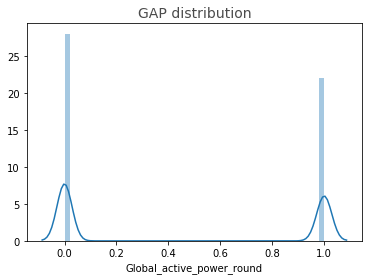

In [180]:
g = sns.distplot(df['Global_active_power_round']);
g.axes.set_title('GAP distribution', fontsize=14, alpha=0.7)

## Separating GAP mean by period (dawn, morning, afternoon, night) by date
gap_per_day_period[period][date] gives the Global Active Power (GAP) separated by periods, and for each period separated by date
<br><br>
Example: GAP for Morning at 01-01-2007 is given by gap_per_day_period[2][01-01-2007]
<br><br>
O objetivo é verificar se é melhor predizer o consumo de energia dependendo do periodo do dia

#### Collecting data from dataset (take some time)

In [106]:
_period = -1
# consumo de energia por dia divido em periodos dos dia 
gap_per_day_period = {1: [], 2: [], 3: [], 4: []}

start_index = -1
end_index = -1

for index, row in df.iterrows():
    dt = row['Date']
    time = row['Time']
    hr = int(time[:2])
    end_index = index        
    
    if(hr >= 0 and hr < 6):
        period = 1 # Madrugada
    elif(hr >= 6 and hr < 12):
        period = 2 # Manha
    elif(hr >= 12 and hr < 18):
        period = 3 # Tarde
    elif(hr >= 18 and hr < 24):
        period = 4 # Noite
        
    if(period != _period and _period != -1):
        gap_avg = df['Global_active_power'].iloc[start_index : end_index].mean(axis=0)
        
        gap_per_day_period[period].append([dt, gap_avg])
        
        _period = period
        start_index = index
    
    if(_period == -1):
        start_index = index
        _period = period
        

#### Agrouping data into a dataframe

In [146]:
consume_at_dawn = pd.DataFrame(data=gap_per_day_period[1], columns = ['Date', 'GAP'])
consume_at_morning = pd.DataFrame(data=gap_per_day_period[2], columns = ['Date', 'GAP'])
consume_at_afternoon = pd.DataFrame(data=gap_per_day_period[3], columns = ['Date', 'GAP'])
consume_at_night = pd.DataFrame(data=gap_per_day_period[4], columns = ['Date', 'GAP'])

frames = [consume_at_dawn, consume_at_morning, consume_at_afternoon, consume_at_night]

consume_per_period = pd.concat(frames, keys=['DAWN', 'MORNING', 'AFTERNOON', 'NIGHT'])
consume_per_period.head()

Date       GAP
DAWN 0  17/12/2006  2.936533
     1  18/12/2006  2.493917
     2  19/12/2006  2.253900
     3  20/12/2006  1.588983
     4  21/12/2006  3.124622

#### Making date conversions

In [147]:
import datetime as dt

consume_per_period['Date'] = pd.to_datetime(consume_per_period['Date'])
consume_per_period['Date'] = consume_per_period['Date'].map(dt.datetime.toordinal)

In [148]:
consume_per_period.describe()

,Date,GAP
count,5765.000000,5765.000000
mean,733383.223764,1.092072
std,418.078209,0.698318
min,732661.000000,0.161300
25%,733022.000000,0.455789
50%,733382.000000,0.990694
75%,733742.000000,1.551678
max,734117.000000,4.418233


#### Making GAP conversions (binary)

In [149]:
consume_per_period['GAP'] = pd.Series(np.where(consume_per_period['GAP'].values >= 1.0, 1, 0), consume_per_period.index)

consume_per_period.head()

Date  GAP
DAWN 0  732662    1
     1  732663    1
     2  732664    1
     3  732665    1
     4  732666    1

C:\Users\Gabriela\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'GAP distribution')

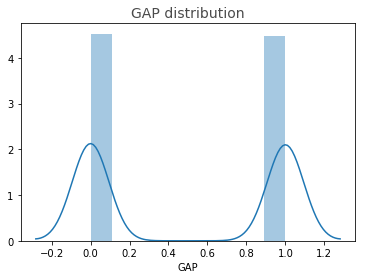

In [155]:
g = sns.distplot(consume_per_period['GAP']);
g.axes.set_title('GAP distribution', fontsize=14, alpha=0.7)

## Resolving imports

In [150]:
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries and functions
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import metrics

## Predicting energy consume (high or low) by date

In [173]:
def define_training_test(seed_number, X, Y, size):
    # Separar os conjuntos de treino e teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=np.random.seed(seed_number), shuffle=False)

    return X_train, Y_train, X_test, Y_test

In [181]:
def linear_regression_graph(period_key):
    # Definir as datas para predição do consumo de energia e o dataset
    if(period_key == 'ALL'):
        dataset = df
        source_ft = ['DateTimeOrd']
        target_ft = 'Global_active_power_round'
        size = 0.01
    else:
        dataset = consume_per_period.loc[period_key]
        source_ft = ['Date']
        target_ft = 'GAP'
        size = 0.3
    
    # Separar os conjuntos de treino e teste
    X = np.array(dataset[source_ft])
    Y = np.array(dataset[target_ft])

    X_train, Y_train, X_test, Y_test = define_training_test(101, X, Y, size)

    # Criar modelo para Regressão Linear
    regr = sk.linear_model.LogisticRegression()

    # Treinar o modelo
    regr.fit(X_train, Y_train)

    # Fazer predições para o conjunto de teste
    Y_pred = regr.predict(X_test)
    
    # Informações sobre a regressão e erro/variâcia dos dados
    print('Coefficients:     ', regr.coef_)
    print('Intercept:        ', regr.intercept_)
    print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred))
    print('Variance score:     %.2f' % r2_score(Y_test, Y_pred))
    print('Accuracy:          ', regr.score(X_test, Y_test))

    # Fazer scatterplot plotando a linha de regressão
    sns.regplot(x=X_test, y=Y_test, scatter_kws={'alpha':0.3}, logistic = True)
#     plt.plot(X_test, Y_pred, color='k', linewidth=1)

    # Ajustar datas no eixo x (converter de ordinal para data)
    ax = plt.gca()
    xticks = ax.get_xticks()
    ax.set_xticklabels([dt.datetime.fromordinal(int(tm)).strftime('%Y-%m-%d\n %H:%M:%S') for tm in xticks], rotation=50)

    # Definir periodo do dia
    if(period_key == 'DAWN'):
        period_name = 'Madrugada'
    elif(period_key == 'MORNING'):
        period_name = 'Manhã'
    elif(period_key == 'AFTERNOON'):
        period_name = 'Tarde'
    elif(period_key == 'NIGHT'):
        period_name = 'Noite'
    elif(period_key == 'ALL'):
        period_name = 'Total'
        
    if(period_key == 'ALL'):
        title = 'Consumo de Energia '
    else:
        title = 'Consumo de Energia de '
        
    # Adicionar título e x/y labels
    ax.set_title(title + period_name)
    ax.set_ylabel('Consumo de Energia')

#     plt.scatter(X_test, Y_test, alpha=0.3)
#     plt.plot(X_test, Y_pred, color='k', linewidth=1)

    plt.show()

In [176]:
warn_set = np.seterr(divide='ignore', invalid='ignore')

### Energy consume by period

Coefficients:      [[1.50561542e-06]]
Intercept:         [2.05375207e-12]
Mean squared error: 0.21
Variance score:     -0.26
Accuracy:           0.792147806004619


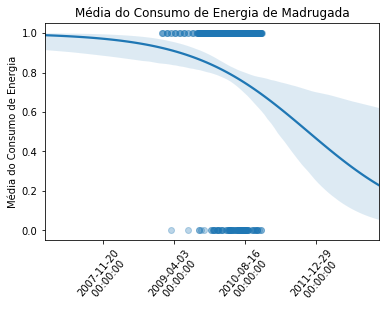

In [177]:
linear_regression_graph('DAWN')

Coefficients:      [[-3.41901224e-06]]
Intercept:         [-4.66252594e-12]
Mean squared error: 0.07
Variance score:     -0.07
Accuracy:           0.9330254041570438


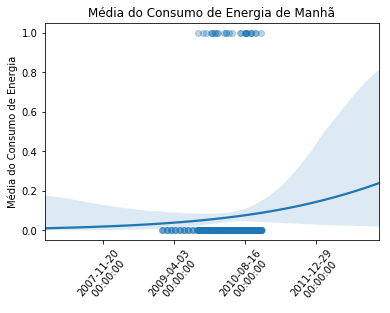

In [169]:
linear_regression_graph('MORNING')

Coefficients:      [[9.09078451e-07]]
Intercept:         [1.23976504e-12]
Mean squared error: 0.27
Variance score:     -0.37
Accuracy:           0.7297921478060047


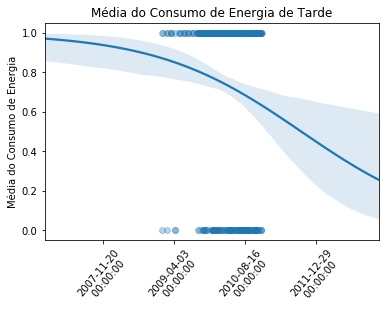

In [170]:
linear_regression_graph('AFTERNOON')

Coefficients:      [[-3.45212613e-07]]
Intercept:         [-4.70764516e-13]
Mean squared error: 0.55
Variance score:     -1.21
Accuracy:           0.45265588914549654


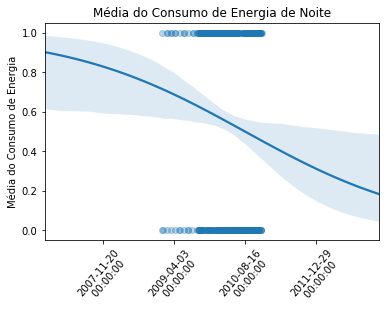

In [171]:
linear_regression_graph('NIGHT')

### Total Energy Consume

Coefficients:      [[1.65147051e-06]]
Intercept:         [2.25130728e-12]
Mean squared error: 0.13
Variance score:     -0.15
Accuracy:           0.8729822194381536


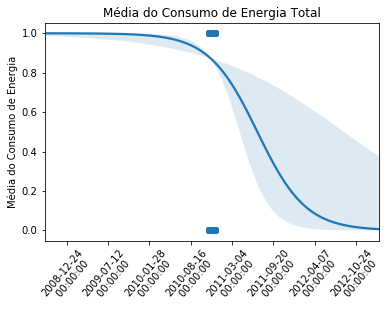

In [178]:
linear_regression_graph('ALL')

In [315]:
_month = -1
_year = -1
# consumo de ar condicionado por mes no ano 
gap_per_month_year = {}

start_index = -1
end_index = -1

for index, row in df.iterrows():
    dt = row['Date']
    date = dt.split('/')
    month = int(date[1])
    year = int(date[2])
    end_index = index
        
    if(_year != year):
        gap_per_month_year[year] = []
        _year = year
    
    if(month != _month):
        if(_month != -1):
            gap_avg = df['Sub_metering_3'].iloc[start_index : end_index].mean(axis=0)
            if(_month == 12):
                gap_per_month_year[year - 1].append([_month, gap_avg])
            else:
                gap_per_month_year[year].append([_month, gap_avg])

        _month = month
        start_index = index

In [317]:
keys = []
consume = {}
frames = []
for year in gap_per_month_year:
    keys.append(year)
    consume[year] = pd.DataFrame(data=gap_per_month_year[year], columns = ['Month', 'SubMetering3'])
    frames.append(consume[year])

consume_per_month = pd.concat(frames, keys=keys)

In [318]:
consume_per_month.head()

Month  SubMetering3
2006 0     12      7.409385
2007 0      1      7.383309
     1      2      6.703545
     2      3      6.504647
     3      4      4.943236

C:\Users\Gabriela\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Gabriela\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Gabriela\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


Text(0,0.5,'Mean energy consume')

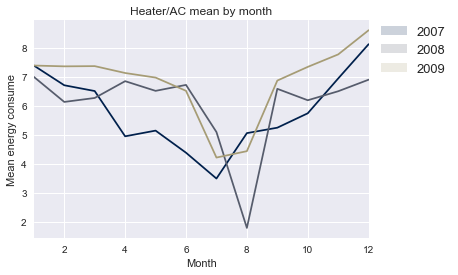

In [345]:
from bokeh.palettes import brewer, cividis, d3
from matplotlib.colors import ListedColormap

sns.set()

years = [2007, 2008, 2009] # years with complete data
years_labels = ['2007', '2008', '2009']
colors = cividis(4)
for key, color in zip(years, colors):
    sns.tsplot(consume_per_month.loc[key]['SubMetering3'], consume_per_month.loc[key]['Month'], color = color)

plt.legend(years_labels, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=13)

plt.title('Heater/AC mean by month')
plt.ylabel('Mean energy consume')